In [1]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
n_dim = 2
x_train, y_train = make_blobs(n_samples = 80,
                              n_features = n_dim,
                              centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]],
                              shuffle = True,
                              cluster_std = 0.3)

In [3]:
x_test, y_test = make_blobs(n_samples = 20,
                           n_features = n_dim,
                           centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]],
                           shuffle = True,
                           cluster_std = 0.3)

In [4]:
def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

In [5]:
y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

In [6]:
def vis_data(x, y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', marketfacecolors = 'none', markeredgecolor = c)
        else:
            plt.plot(x_[0], x_[1], c + 'o' if y_ == 0 else c + '+')

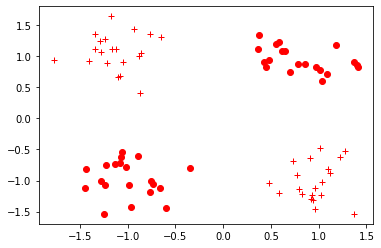

In [7]:
plt.figure()
vis_data(x_train, y_train, c = 'r')
plt.show()

In [8]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [9]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [10]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [11]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print("Before Training, Test loss is {}".format(test_loss_before.item()))

Before Training, Test loss is 0.7019420862197876


In [12]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print("Train loss at {} is {}".format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.702201783657074
Train loss at 100 is 0.6477316617965698
Train loss at 200 is 0.5905576348304749
Train loss at 300 is 0.5304896235466003
Train loss at 400 is 0.4806961119174957
Train loss at 500 is 0.44552427530288696
Train loss at 600 is 0.42261195182800293
Train loss at 700 is 0.4075961112976074
Train loss at 800 is 0.3967328667640686
Train loss at 900 is 0.3878968060016632
Train loss at 1000 is 0.3810049891471863
Train loss at 1100 is 0.3763422966003418
Train loss at 1200 is 0.3727979362010956
Train loss at 1300 is 0.3699061870574951
Train loss at 1400 is 0.3674919605255127
Train loss at 1500 is 0.3654179871082306
Train loss at 1600 is 0.3635826110839844
Train loss at 1700 is 0.36192411184310913
Train loss at 1800 is 0.3604188561439514
Train loss at 1900 is 0.3590927720069885


In [13]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test)
print("After Training, Test loss is {}".format(test_loss.item()))

After Training, Test loss is 0.3716433644294739


In [14]:
torch.save(model.state_dict(), './model.pt')
print("state_dict format of the model: {}".format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.2975,  1.5729],
        [-0.0697,  0.3968],
        [ 0.2077,  0.0714],
        [ 0.8464,  1.3420],
        [ 0.7880,  1.3121]])), ('linear_1.bias', tensor([-0.5782, -0.6597, -0.4257, -0.3837, -0.3247])), ('linear_2.weight', tensor([[ 2.0446, -0.0698, -0.2155, -1.3485, -1.5341]])), ('linear_2.bias', tensor([-0.0057]))])


In [15]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print("Vector[-1, 1]'s Probability to get label 1 is {}".format(new_model(torch.FloatTensor([-1, 1])).item()))

Vector[-1, 1]'s Probability to get label 1 is 0.9855723977088928
